In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#CHECKING FOR NULL VALUES

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# OBSERVATIONS

i)Age has 177 null values->replacing missing age values with median, 

ii)Embarked has 2 null values-> replacing missing embarked values with mode(most frequently occuring value) 
  
iii)cabin has 687 rows -> as cabin has huge null values and seems not so important factor so dropped it.

In [6]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [7]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [8]:
df.drop(['Cabin'],axis=1,inplace=True)

Passengerid,Ticket and Name doesnt play a role in survival so dropping them as well

In [9]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

Since embarked and sex columns are of object types converting them into numeric by labelencoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
df['Embarked']=le.fit_transform(df['Embarked'])

df['Sex']=le.fit_transform(df['Sex'])

In [12]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# CHECKING CORRELATION

In [13]:
df_co=df.corr()
df_co

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline

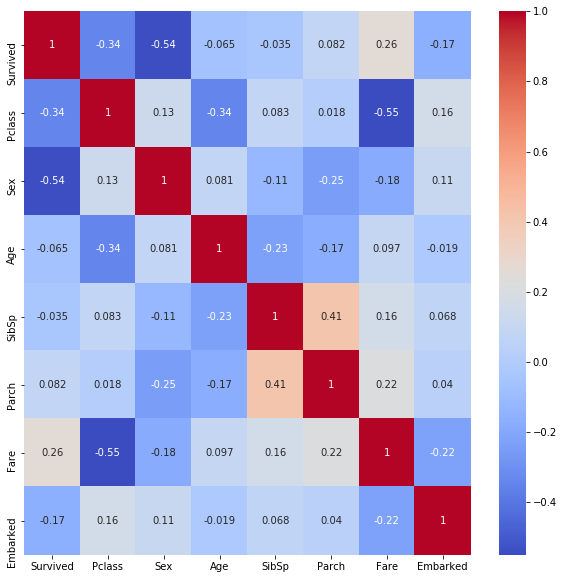

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_co,cmap='coolwarm',annot=True)

# PLOTTING OUTLIERS

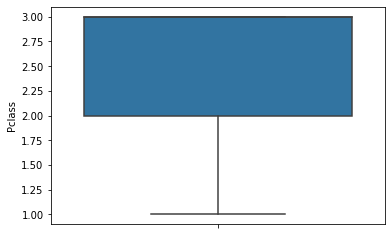

In [16]:
 sns.boxplot(df['Pclass'],orient="v")

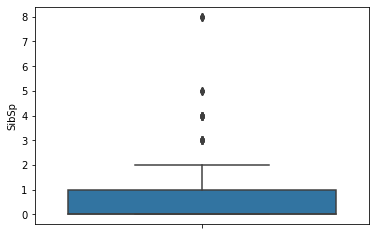

In [17]:
 sns.boxplot(df['SibSp'],orient="v")

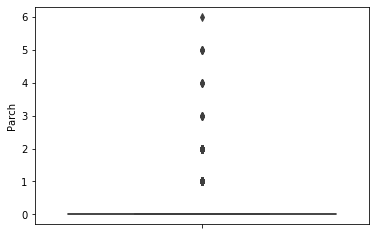

In [18]:
 sns.boxplot(df['Parch'],orient="v")

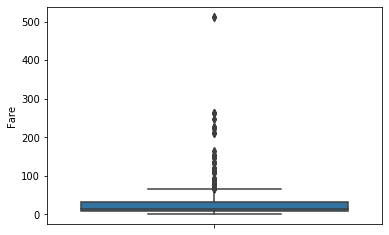

In [19]:
 sns.boxplot(df['Fare'],orient="v")

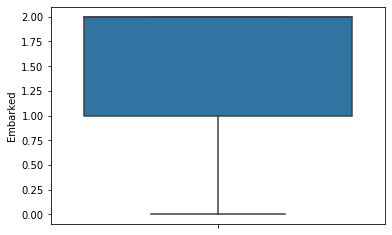

In [20]:
 sns.boxplot(df['Embarked'],orient="v")

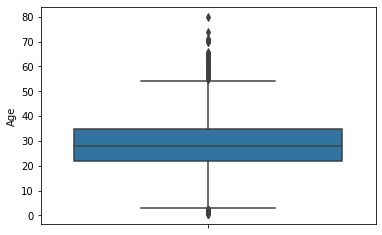

In [21]:
 sns.boxplot(df['Age'],orient="v")

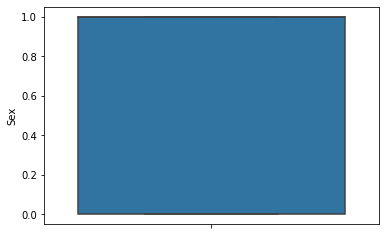

In [22]:
 sns.boxplot(df['Sex'],orient="v")

Checking if data is normally distributed or not

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

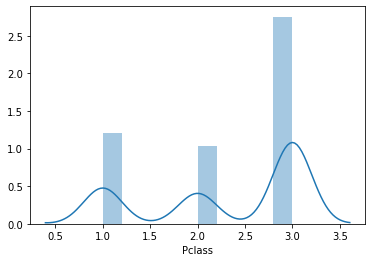

In [24]:
sns.distplot(df['Pclass'])

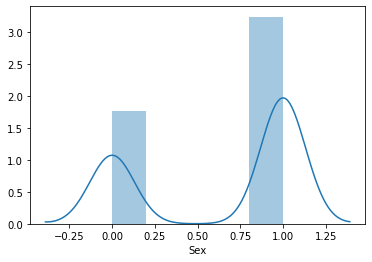

In [25]:
sns.distplot(df['Sex'])

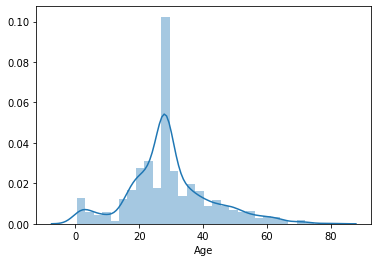

In [26]:
sns.distplot(df['Age'])

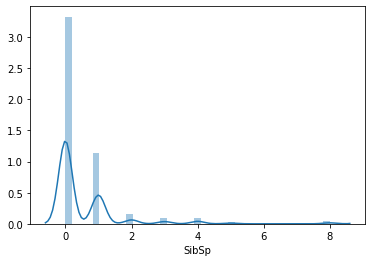

In [27]:
sns.distplot(df['SibSp'])

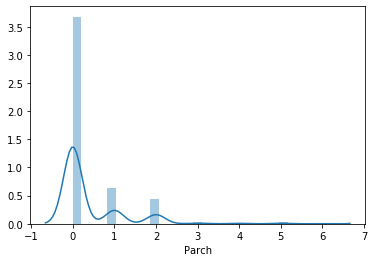

In [28]:
sns.distplot(df['Parch'])

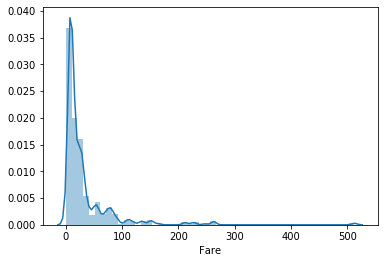

In [29]:
    sns.distplot(df['Fare'])

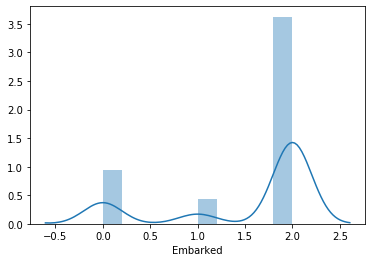

In [30]:
sns.distplot(df['Embarked'])

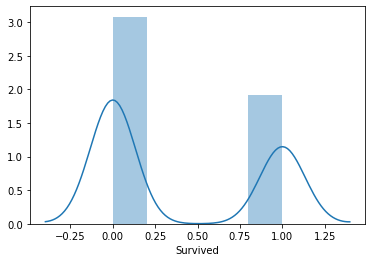

In [31]:
sns.distplot(df['Survived'])

WE can observe data  is not normally distributed

In [32]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

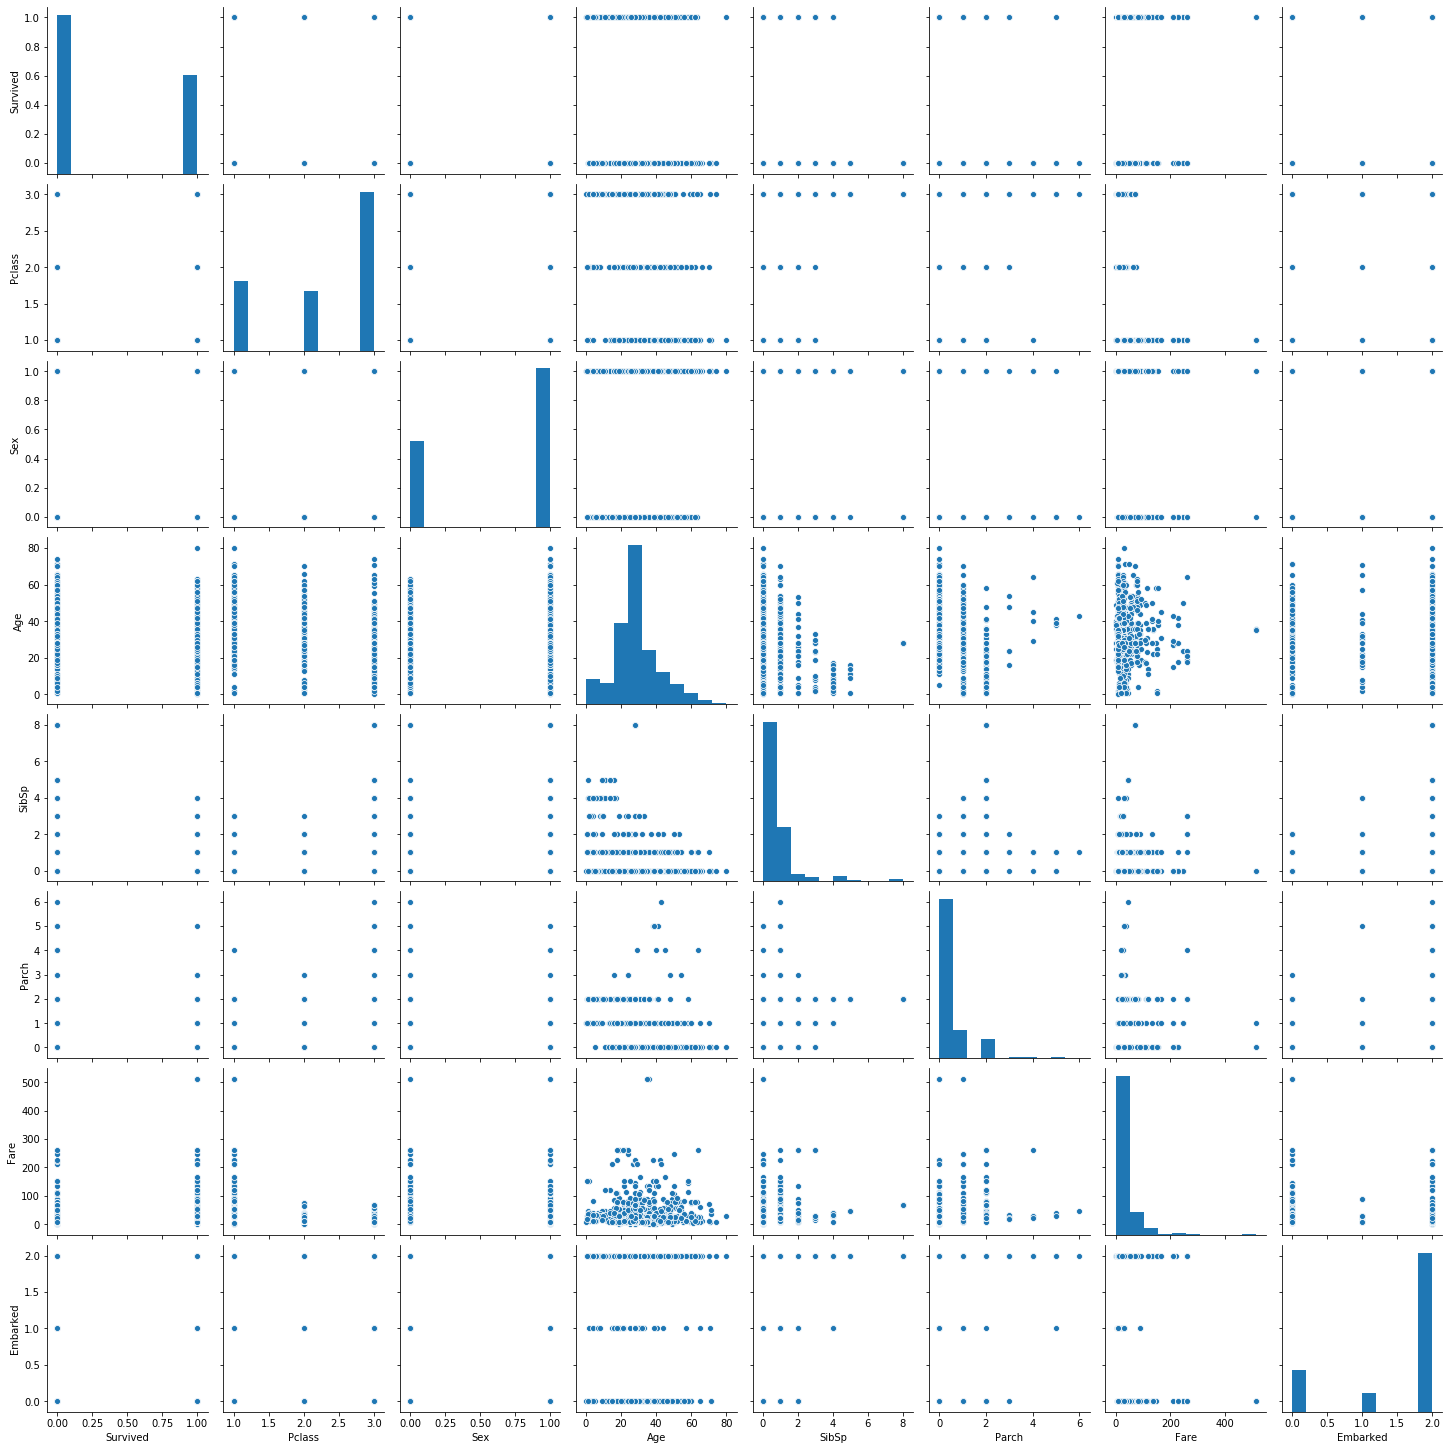

In [33]:
sns.pairplot(df)

Removing outliers using z score

In [34]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

#defining threshold,values above threshold are outliers
threshold = 3
print(np.where(z > 3))


#removing outliers
df2=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df2.shape)




[[0.78927234 0.82737724 0.73769513 ... 0.47367361 0.50244517 0.58595414]
 [1.2669898  1.56610693 1.35557354 ... 0.47367361 0.78684529 1.9423032 ]
 [1.2669898  0.82737724 1.35557354 ... 0.47367361 0.48885426 0.58595414]
 ...
 [0.78927234 0.82737724 1.35557354 ... 2.00893337 0.17626324 0.58595414]
 [1.2669898  1.56610693 0.73769513 ... 0.47367361 0.04438104 1.9423032 ]
 [0.78927234 0.82737724 0.73769513 ... 0.47367361 0.49237783 0.67817453]]
(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4

Percentage of data removed by Z score (71/891)*100= 7.9 percent

Checking using IQR 


In [36]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64

In [37]:
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
df1.shape

(577, 8)

# Percentage of data removed by IQR (314/891)*100= 35.2 percent 
Hence we opt for Z score

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')






In [40]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [81]:
X=df2.iloc[:,1:8]
Y=df2.iloc[:,0]

Removing skewness of data
yeo-johnson works for both +ve and -ve values whereas box-cox works only for positive values

In [82]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [83]:
X


array([[ 0.87283049,  0.72203588, -0.58229147, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.71573902, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.24690693, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273, -0.08229703, ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.24690693, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.24155913, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [84]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [94]:
Y=Y.values.reshape(-1,1)


In [95]:
X.shape

(820, 7)

In [96]:
Y.shape

(820, 1)

Finding best accuracies and corresponding best random state for each of the models

In [97]:
best_Randstate=0
accuracy=0
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
            for i in range(20,200):
                                    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.28,random_state=i)
                                    m.fit(x_train,y_train)
                                    predicted_y=m.predict(x_test)
                                    accu_temp=accuracy_score(y_test,predicted_y)
                                    if(accu_temp>accuracy):
                                                accuracy=accu_temp
                                                best_Randstate=i
            print("Acuuracy of ",accuracy,"for Model::",m,"found in Random state:",best_Randstate)

Acuuracy of  0.8478260869565217 for Model:: LogisticRegression() found in Random state: 46
Acuuracy of  0.8478260869565217 for Model:: GaussianNB() found in Random state: 46
Acuuracy of  0.8782608695652174 for Model:: SVC() found in Random state: 189
Acuuracy of  0.8782608695652174 for Model:: DecisionTreeClassifier() found in Random state: 189
Acuuracy of  0.8782608695652174 for Model:: KNeighborsClassifier() found in Random state: 189


we can observe 87% accuracy for both decision tree and kneighbors in their best random states hence we can choose either of them

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.28,random_state=189)

In [99]:
print("Y test::",y_test.shape)
print(" y train:",y_train.shape)
print(" x train:",x_train.shape)
print(" x test:",x_test.shape)

Y test:: (230, 1)
 y train: (590, 1)
 x train: (590, 7)
 x test: (230, 7)


In [101]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_dtc))
print("Confusion Matrix::",confusion_matrix(y_test,predicted_dtc))
print("Classification Report ::",classification_report(y_test,predicted_dtc))

Accuracy score:: 0.7869565217391304
Confusion Matrix:: [[128  28]
 [ 21  53]]
Classification Report ::               precision    recall  f1-score   support

           0       0.86      0.82      0.84       156
           1       0.65      0.72      0.68        74

    accuracy                           0.79       230
   macro avg       0.76      0.77      0.76       230
weighted avg       0.79      0.79      0.79       230



# HYPER PARAMETER TUNING

In [115]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [117]:
from sklearn.model_selection import GridSearchCV

Dt_grid=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='accuracy')


In [118]:
Dt_grid.fit(x_train,y_train)
Dt_grid.best_estimator_
gcv_pred=Dt_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,gcv_pred))

Accuracy after parameter tuning:: 0.8652173913043478


We can observe that performance increased from  78 to 86 after tuning paramaeters

# SERIALIZATION

In [119]:
import joblib

In [120]:
joblib.dump(Dt_grid.best_estimator_,"Titanic_trainproject.pkl")

['Titanic_trainproject.pkl']